In [26]:
import numpy as np

from scipy.io import loadmat

import pandas as pd

from numpy.linalg import eig

import matplotlib.pyplot as plt

from scipy.stats import mode

import seaborn as sns

In [27]:
class PCA :
    
    
    # ---------------function to calculate eigen values and eigen vector for any matrix
    
    
    def eig_vector( self, X ) :
        
        # centralize
    
        mean = np.mean( X, 0 )
        
        X_stand = X - mean
    
        # calculate co-variance matrix
    
        X_cov = np.cov( np.transpose( X_stand ) )
    
        # find the eigenvalues and eigenvectors
    
        e, V = eig( X_cov )
    
        # sort eigen vector according to eigen values 
        
        idx = np.argsort( -e )

        e = e[idx]

        V = V[:,idx]
        
        m, n = V.shape
        
        return e, V 



    # ----------------projection of X--------------------
    
    def transformation( self, X, no_of_components ) :
        
        e, V = self.eig_vector( X )
        
        p = V[:, : no_of_components ]
    
        # project the original dataset
    
        mean = np.mean( X, 0 )
        
        X_stand = X - mean
    
        X_transform = np.dot( X_stand, p )
        
        return X_transform

In [28]:
# function return number of components 

def conditional_number( X ) :
    
    pca = PCA()
    
    e, V = pca.eig_vector( X )
    
    e_max = e[0]
    
    condition = e_max / 10
    
    no_of_components = 0
    
    for i in e :
        
        if( i > ( condition ) ) :
            
            no_of_components = no_of_components + 1
    
    return no_of_components

In [29]:
data = loadmat( 'Databases/breastCancer.mat' )

X = data['X']

y = data['Y']

print( X.shape )

print( y.shape )

(569, 30)
(569, 1)


In [30]:
df = pd.DataFrame( X )

In [31]:
df.head( 5 )

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [33]:

X.shape

(569, 30)

In [34]:
no_of_components_conditonal_number = conditional_number( X )

print( "Conditional number : ", no_of_components_conditonal_number )

Conditional number :  1


In [35]:
pca = PCA()

X_conditional_number = pca.transformation( X, no_of_components_conditonal_number )

In [11]:
print( X_conditional_number.shape )

print( y.shape )

print( pd.DataFrame( y ).value_counts() ) 

(569, 1)
(569, 1)
0    357
1    212
dtype: int64


/home/mohit-baliyan/miniconda3/envs/Five-Day/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

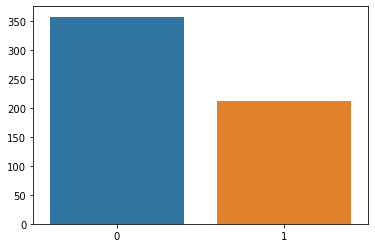

In [12]:
sns.barplot( [ 0, 1 ] , pd.DataFrame( y ).value_counts() )

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_conditional_number, y, test_size = 0.30, shuffle = True )

In [15]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit( X_train, y_train )

y_pred = logit.predict( X_test )

/home/mohit-baliyan/miniconda3/envs/Five-Day/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

TN, FP, FN, TP = confusion_matrix( y_test, y_pred ).ravel()

In [17]:
print( "True Negative  : ", TN )

print( "False Positive : ", FP )

print( "False Negative : ", FN )

print( "True Positive : ", TP )

True Negative  :  98
False Positive :  9
False Negative :  13
True Positive :  51


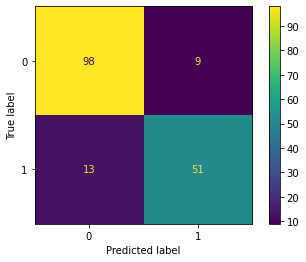

In [18]:
plot_confusion_matrix( logit, X_test, y_test )

# Accuracy Score

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score( y_test, y_pred )

0.8713450292397661

# Error Rate

In [20]:
1 - accuracy_score( y_test, y_pred )

0.1286549707602339

# Recall or True Positive Rate or Sensitivity

In [21]:
recall = TP / ( TP + FN )

recall

0.796875

# Precision

In [22]:
precision = TP / ( TP + FP )

precision

0.85

# Specificity (or Selectivity or True Negative Rate) 

In [23]:
specificity = TN / ( TN + FP )

specificity

0.9158878504672897

# F1 Score 

In [24]:
F1 = 2 * ( recall * precision ) / ( recall + precision )

F1 

0.8225806451612903

# Balanced Accuracy 

In [25]:
balanced_accuracy = ( recall + specificity ) / 2 

balanced_accuracy

0.8563814252336448